# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [3]:
import tensorflow.keras
from tensorflow.keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Visualize the First 24 Training Images

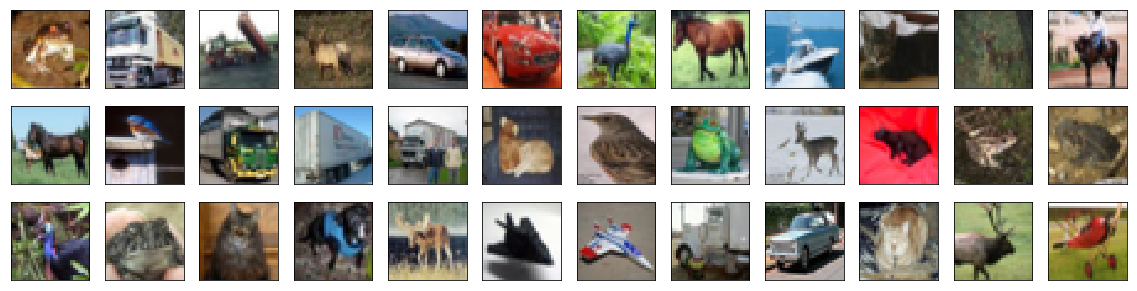

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [5]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [6]:
from tensorflow.keras.utils import to_categorical

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture 

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation

model = Sequential()

model = Sequential()

model.add(Conv2D(16, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_93 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
activation_71 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 30, 30, 16)        2320      
_________________________________________________________________
activation_72 (Activation)   (None, 30, 30, 16)        0         
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 15, 15, 32)        4640      
__________

### 6. Compile the Model 

In [35]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])

### 7. Train the Model 

In [36]:
from tensorflow.keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=512, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=1, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 18s 406us/step - loss: 2.0630 - acc: 0.2194 - val_loss: 1.8247 - val_acc: 0.3030

Epoch 00001: val_loss improved from inf to 1.82473, saving model to model.weights.best.hdf5
Epoch 2/100
45000/45000 [==============================] - 15s 335us/step - loss: 1.7319 - acc: 0.3510 - val_loss: 1.5352 - val_acc: 0.4376

Epoch 00002: val_loss improved from 1.82473 to 1.53518, saving model to model.weights.best.hdf5
Epoch 3/100
45000/45000 [==============================] - 14s 303us/step - loss: 1.5449 - acc: 0.4305 - val_loss: 1.3880 - val_acc: 0.4936

Epoch 00003: val_loss improved from 1.53518 to 1.38797, saving model to model.weights.best.hdf5
Epoch 4/100
45000/45000 [==============================] - 14s 305us/step - loss: 1.4280 - acc: 0.4778 - val_loss: 1.2875 - val_acc: 0.5282

Epoch 00004: val_loss improved from 1.38797 to 1.28748, saving model to model.weights.best.hdf5
Epoch 5

45000/45000 [==============================] - 14s 302us/step - loss: 0.7583 - acc: 0.7331 - val_loss: 0.7249 - val_acc: 0.7428

Epoch 00036: val_loss did not improve from 0.71458
Epoch 37/100
45000/45000 [==============================] - 14s 302us/step - loss: 0.7506 - acc: 0.7341 - val_loss: 0.7122 - val_acc: 0.7510

Epoch 00037: val_loss improved from 0.71458 to 0.71221, saving model to model.weights.best.hdf5
Epoch 38/100
45000/45000 [==============================] - 14s 304us/step - loss: 0.7520 - acc: 0.7330 - val_loss: 0.7054 - val_acc: 0.7542

Epoch 00038: val_loss improved from 0.71221 to 0.70538, saving model to model.weights.best.hdf5
Epoch 39/100
45000/45000 [==============================] - 14s 304us/step - loss: 0.7489 - acc: 0.7364 - val_loss: 0.7202 - val_acc: 0.7472

Epoch 00039: val_loss did not improve from 0.70538
Epoch 40/100
45000/45000 [==============================] - 14s 305us/step - loss: 0.7477 - acc: 0.7368 - val_loss: 0.7188 - val_acc: 0.7456

Epoch 000

45000/45000 [==============================] - 15s 323us/step - loss: 0.5980 - acc: 0.7883 - val_loss: 0.6170 - val_acc: 0.7900

Epoch 00075: val_loss did not improve from 0.60448
Epoch 76/100
45000/45000 [==============================] - 13s 292us/step - loss: 0.5952 - acc: 0.7912 - val_loss: 0.5976 - val_acc: 0.7888

Epoch 00076: val_loss improved from 0.60448 to 0.59758, saving model to model.weights.best.hdf5
Epoch 77/100
45000/45000 [==============================] - 13s 293us/step - loss: 0.5971 - acc: 0.7894 - val_loss: 0.6113 - val_acc: 0.7892

Epoch 00077: val_loss did not improve from 0.59758
Epoch 78/100
45000/45000 [==============================] - 13s 293us/step - loss: 0.5960 - acc: 0.7885 - val_loss: 0.6001 - val_acc: 0.7912

Epoch 00078: val_loss did not improve from 0.59758
Epoch 79/100
45000/45000 [==============================] - 13s 294us/step - loss: 0.5896 - acc: 0.7904 - val_loss: 0.6200 - val_acc: 0.7820

Epoch 00079: val_loss did not improve from 0.59758
Epo

### 8. Load the Model with the Best Validation Accuracy

In [37]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [38]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7896


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [12]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

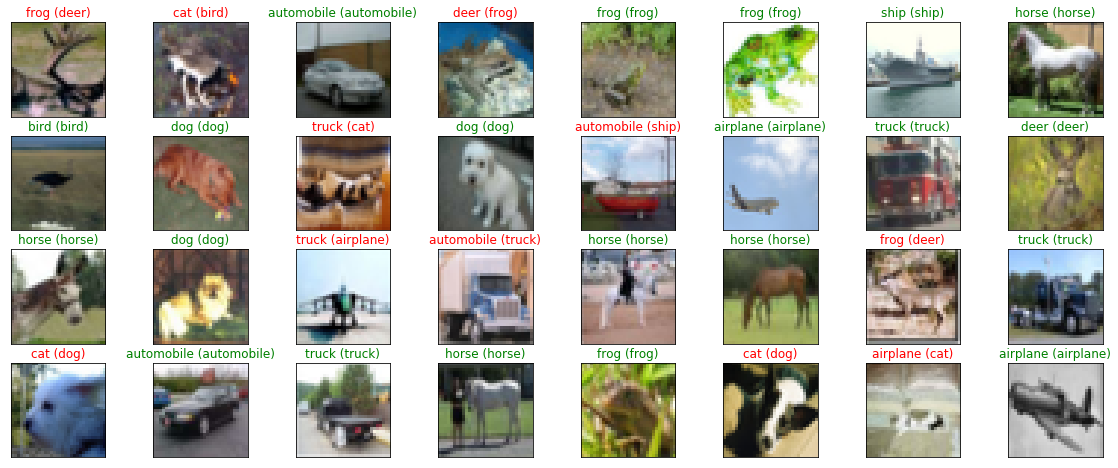

In [13]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))